In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/flower-dataset/flower_dataset.csv


## Import All Data Visualization Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

In [3]:
%matplotlib inline
cf.go_offline()

## Importing All Machine Learning Libraries

In [4]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay

## Reading csv file 

In [5]:
flower = pd.read_csv(os.path.join(dirname, filename))

In [6]:
flower.head()

,species,size,fragrance,height_cm
0,rose,medium,mild,48.55
1,shoeblack plant,medium,mild,147.07
2,shoeblack plant,medium,none,102.93
3,hibiscus,large,none,184.00
4,shoeblack plant,large,mild,83.07


## Gaining info about the dataset

In [7]:
flower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    10000 non-null  object 
 1   size       10000 non-null  object 
 2   fragrance  10000 non-null  object 
 3   height_cm  10000 non-null  float64
dtypes: float64(1), object(3)
memory usage: 312.6+ KB


In [8]:
flower.describe()

,height_cm
count,10000.000000
mean,104.873938
std,43.635191
min,30.090000
25%,69.307500
50%,100.510000
75%,137.022500
max,199.970000


## Checking for Missing Datas

In [9]:
flower.isnull()

,species,size,fragrance,height_cm
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
9995,False,False,False,False
9996,False,False,False,False
9997,False,False,False,False
9998,False,False,False,False


Confirming the presence of missing data with heatmap

<Axes: >

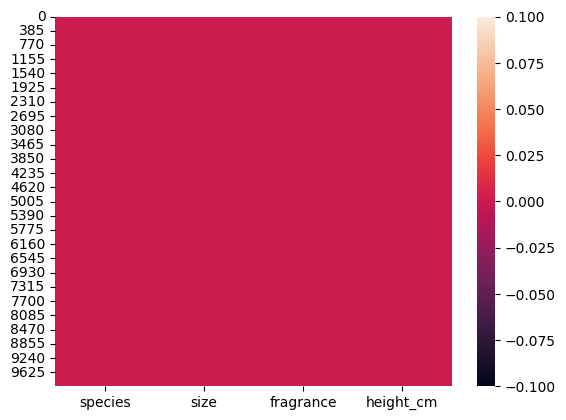

In [10]:
sns.heatmap(flower.isnull())

## Plotting Various relations

array([[<Axes: title={'center': 'height_cm'}>]], dtype=object)

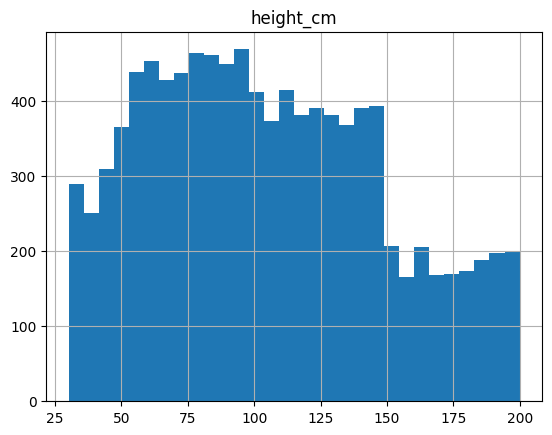

In [11]:
flower.hist(bins=30)

<Axes: xlabel='size', ylabel='count'>

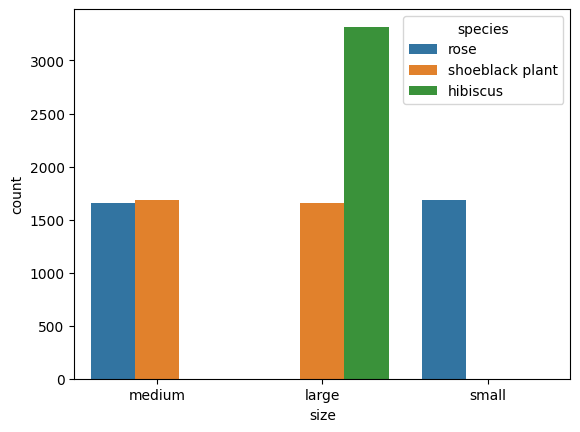

In [12]:
sns.countplot(data=flower, x='size', hue='species')

<Axes: xlabel='fragrance', ylabel='count'>

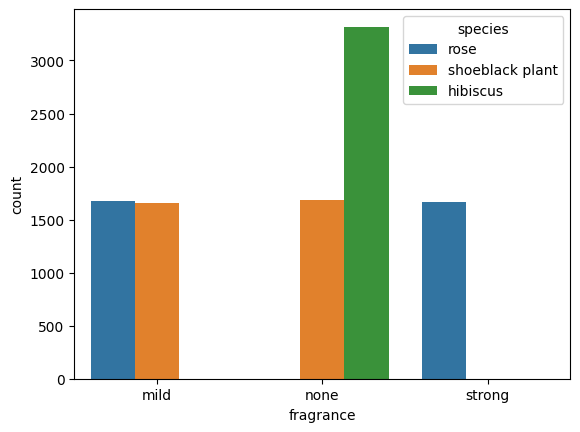

In [13]:
sns.countplot(data=flower, x='fragrance', hue='species')

## Encoding categorical data

In [14]:
labelencoder = LabelEncoder()
flower['fragrance'] = labelencoder.fit_transform(flower['fragrance'])
flower['size'] = labelencoder.fit_transform(flower['size'])
flower['species'] = labelencoder.fit_transform(flower['species'])

In [15]:
flower.head()

,species,size,fragrance,height_cm
0,1,1,0,48.55
1,2,1,0,147.07
2,2,1,1,102.93
3,0,0,1,184.00
4,2,0,0,83.07


In [16]:
X = flower.iloc[:,1:]
X

,size,fragrance,height_cm
0,1,0,48.55
1,1,0,147.07
2,1,1,102.93
3,0,1,184.00
4,0,0,83.07
...,...,...,...
9995,0,1,109.52
9996,1,0,145.23
9997,0,1,126.69
9998,0,1,77.62


In [17]:
y = flower.iloc[:,0]
y

0       1
1       2
2       2
3       0
4       2
       ..
9995    0
9996    2
9997    0
9998    2
9999    1
Name: species, Length: 10000, dtype: int64

## Splitting data into training set and testing set

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
cross_val_score(KNeighborsClassifier(n_neighbors=3),X_train,y_train)

array([0.903125, 0.895625, 0.906875, 0.9     , 0.903125])

## Creating an instance of KNeighborsClassifier and fitting the model and Predictions and checking for the best value of k

In [20]:
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i) #checking for various number of neighbors
    knn.fit(X_train, y_train) #fitting the data to the model
    pred_i = knn.predict(X_test) #prediction
    error_rate.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Error_Rate')

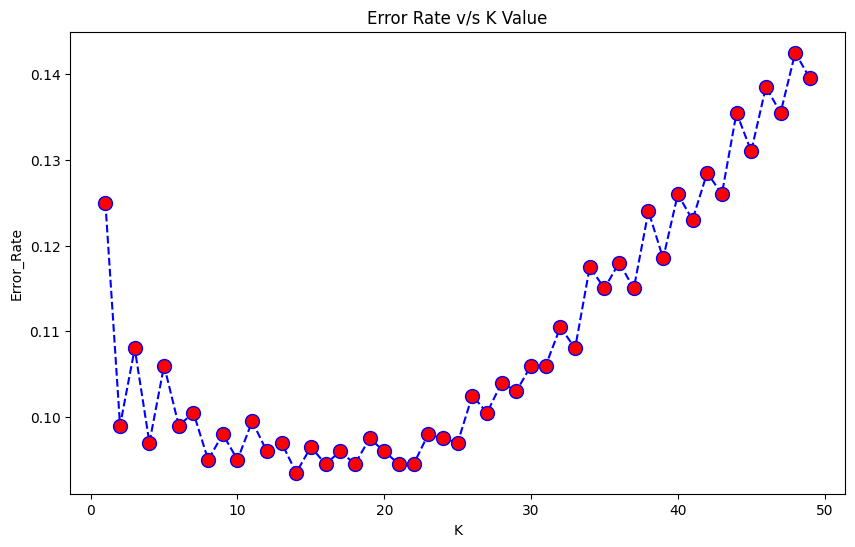

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate v/s K Value')
plt.xlabel('K')
plt.ylabel('Error_Rate')

In [22]:
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(y_test, pred))
print("\nClassification Report")
print(classification_report(y_test, pred))

Confusion Matrix
[[647   0   0]
 [  0 636  18]
 [ 99  72 528]]

Classification Report
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       647
           1       0.90      0.97      0.93       654
           2       0.97      0.76      0.85       699

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.90      2000
weighted avg       0.91      0.91      0.90      2000



In [23]:
knn.score(X_test, y_test)

0.9055

## Trying prediction on various models with all parameters

In [24]:
classification_models= {
    'Linear Regression': LinearRegression(),
    'Logistic Regression': LogisticRegression(),
    'K-nearest Neighbours': KNeighborsClassifier(n_neighbors=22),
    'Support Vector Machines': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [25]:
# To store the model name and the corresponding accuracy
model_names = []
accuracies = []

Linear Regression accuracy: 0.28501789328642757
Logistic Regression accuracy: 0.8755
K-nearest Neighbours accuracy: 0.9055
Support Vector Machines accuracy: 0.68
Decision Tree accuracy: 0.879
Random Forest accuracy: 0.876


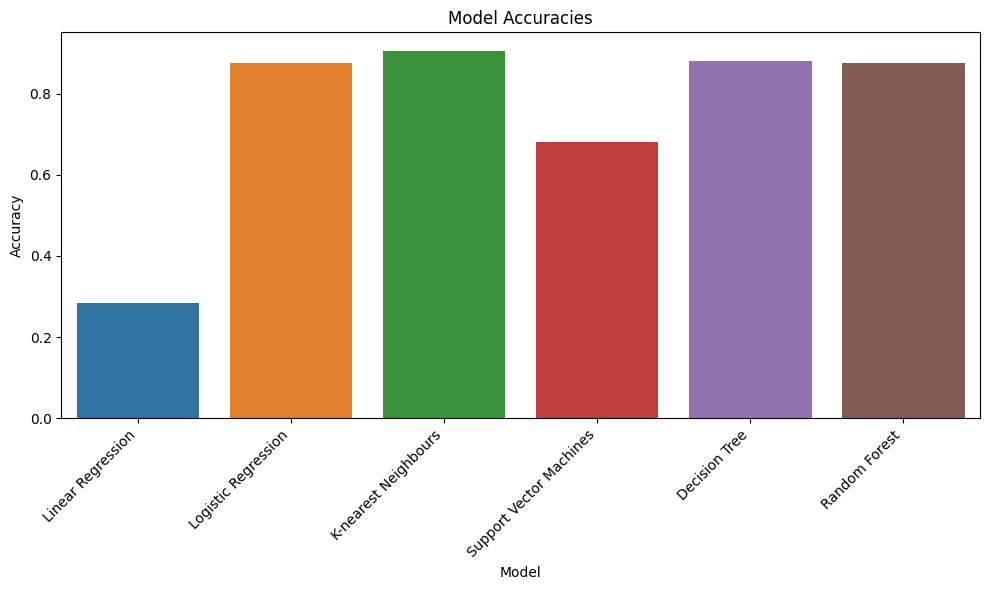

In [26]:
# Train and evaluate each model
for name, clf in classification_models.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    model_names.append(name)
    accuracies.append(score)
    print(f"{name} accuracy: {score}")

# Create a DataFrame for model accuracies
df_models = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df_models)
plt.title('Model Accuracies')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust the plot to make sure everything fits without overlapping
plt.show()

In [27]:
# Find the best model
best_index = accuracies.index(max(accuracies))
best_model_name = model_names[best_index]
best_model = classification_models[best_model_name]

print(f"The best model when size, frangrance and height of the plant is given: {best_model_name} with an accuracy of {accuracies[best_index]:}")

The best model when size, frangrance and height of the plant is given: K-nearest Neighbours with an accuracy of 0.9055


In [28]:
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(y_test, pred))
print("\nClassification Report")
print(classification_report(y_test, pred))

Confusion Matrix
[[647   0   0]
 [  0 636  18]
 [ 99  72 528]]

Classification Report
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       647
           1       0.90      0.97      0.93       654
           2       0.97      0.76      0.85       699

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.90      2000
weighted avg       0.91      0.91      0.90      2000



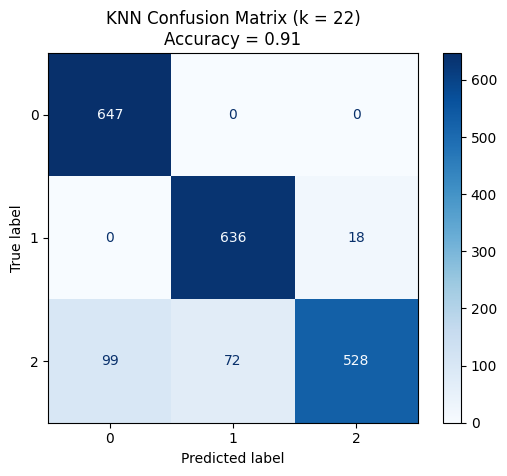

In [29]:
accuracy = accuracy_score(y_test, pred)
cm = confusion_matrix(y_test, pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"KNN Confusion Matrix (k = 22)\nAccuracy = {accuracy:.2f}")
plt.show()

## Trying prediction with only 2 parameters

In [30]:
X = flower.iloc[:,2:]
X

,fragrance,height_cm
0,0,48.55
1,0,147.07
2,1,102.93
3,1,184.00
4,0,83.07
...,...,...
9995,1,109.52
9996,0,145.23
9997,1,126.69
9998,1,77.62


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
model_names = []
accuracies = []

Linear Regression accuracy: 0.2853751806914123
Logistic Regression accuracy: 0.703
K-nearest Neighbours accuracy: 0.819
Support Vector Machines accuracy: 0.662
Decision Tree accuracy: 0.781
Random Forest accuracy: 0.777


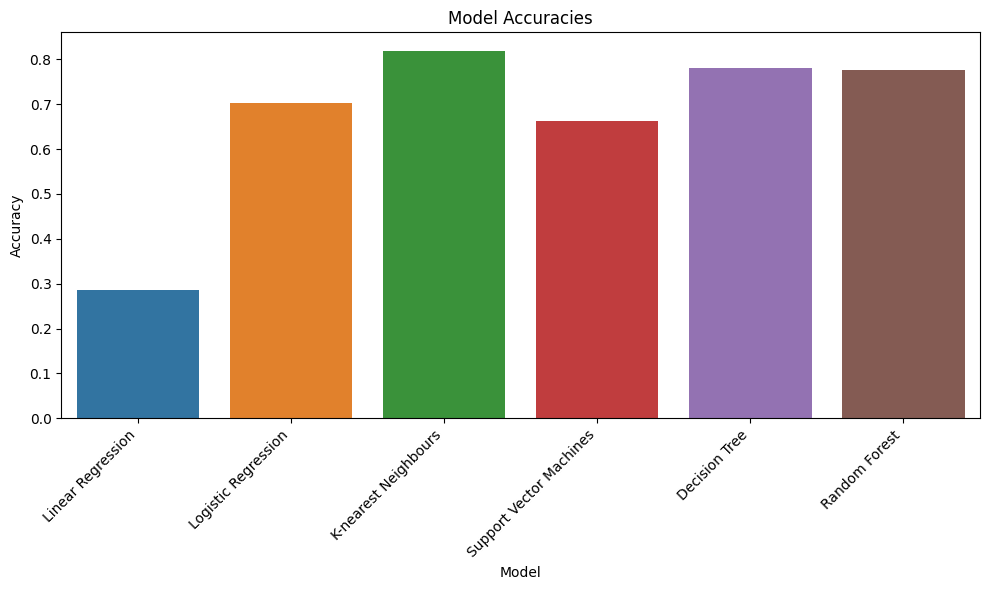

In [33]:
# Train and evaluate each model
for name, clf in classification_models.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    model_names.append(name)
    accuracies.append(score)
    print(f"{name} accuracy: {score}")

# Create a DataFrame for model accuracies
df_models = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df_models)
plt.title('Model Accuracies')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust the plot to make sure everything fits without overlapping
plt.show()

In [34]:
# Find the best model
best_index = accuracies.index(max(accuracies))
best_model_name = model_names[best_index]
best_model = classification_models[best_model_name]

print(f"The best model when frangrance and height of the plant is given: {best_model_name} with an accuracy of {accuracies[best_index]:}")

The best model when frangrance and height of the plant is given: K-nearest Neighbours with an accuracy of 0.819


In [35]:
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(y_test, pred))
print("\nClassification Report")
print(classification_report(y_test, pred))

Confusion Matrix
[[642   0   5]
 [  0 613  41]
 [183 133 383]]

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.99      0.87       647
           1       0.82      0.94      0.88       654
           2       0.89      0.55      0.68       699

    accuracy                           0.82      2000
   macro avg       0.83      0.83      0.81      2000
weighted avg       0.83      0.82      0.81      2000



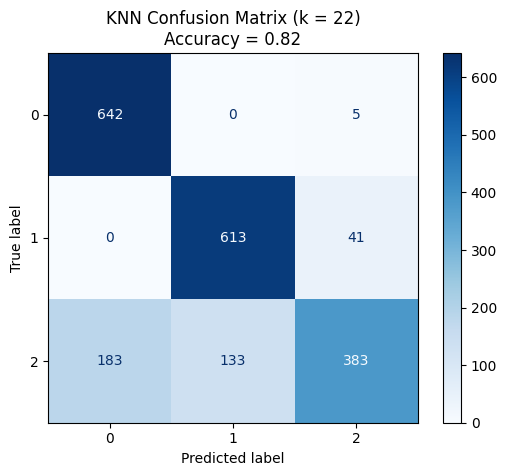

In [36]:
accuracy = accuracy_score(y_test, pred)
cm = confusion_matrix(y_test, pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"KNN Confusion Matrix (k = 22)\nAccuracy = {accuracy:.2f}")
plt.show()

## Conclusion 

*** Observation**

     * Among the 3 speices of flowers in the dataset, Rose, Hibiscus and Shoeblack Plan Hibiscus has the largest size and No Fragrance
     * and Rose and Shoeblack Plant appear to be same in terms of size and intensity fragrance
 
*** Prediction Model**

    * KNeighborsClassifer car predict species of flower given its size, fragrance and height with about 90.5% accuracy whereas it drops to 81.9% when only fragrance and height is taken into consideration